In [8]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

In [29]:
dataset = pd.read_csv('StudentsPerformance.csv',error_bad_lines=False)
dataset.dtypes

/tmp/ipykernel_17083/2984986227.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataset = pd.read_csv('StudentsPerformance.csv',error_bad_lines=False)


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [30]:
dataset.dropna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [32]:
dataset['math score'].mean()

66.089

/home/chetan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


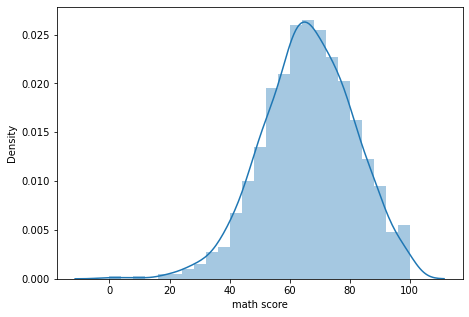

In [27]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sb.distplot(dataset['math score'])
plt.show()

/home/chetan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score'>

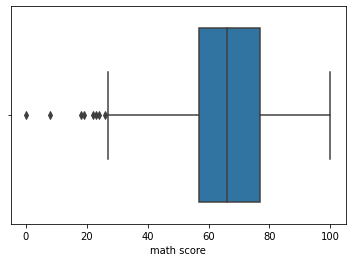

In [26]:
sb.boxplot(dataset['math score'])

In [34]:
Q1 = np.percentile(dataset['math score'], 25,interpolation = 'midpoint')
Q3 = np.percentile(dataset['math score'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(IQR)

77.0
57.0
20.0


/tmp/ipykernel_17083/1714832441.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(dataset['math score'], 25,interpolation = 'midpoint')
/tmp/ipykernel_17083/1714832441.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(dataset['math score'], 75,interpolation = 'midpoint')


In [35]:
upper_limit = Q1 + 1.5 * IQR
lower_limit = Q3 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

87.0
47.0
